<a href="https://colab.research.google.com/github/MARTINEZAIS/LABORATORI4ISAACMTZ101/blob/main/Laboratorio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/TXT/example.txt"

open(path).readline()

In [ ]:
import json
path = "/content/drive/MyDrive/TXT/example.txt"
records = [json.loads(line) for line in open(path)]
records[0]


In [ ]:
import json
path = "/content/drive/MyDrive/TXT/example.txt"
records = [json.loads(line) for line in open(path)]
records[0]['tz']
print (records[0]['tz'])



In [ ]:
import json
path = "/content/drive/MyDrive/TXT/example.txt"
time_zones = [rec['tz'] for rec in records]

In [ ]:
import json
path = "/content/drive/MyDrive/TXT/example.txt"
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

In [ ]:
import json
path = "/content/drive/MyDrive/TXT/example.txt"
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

In [ ]:
from pandas import DataFrame, Series
import pandas as pd
frame = DataFrame(records)
frame

In [ ]:
from pandas import DataFrame, Series
import pandas as pd
frame['tz'][:10]

In [ ]:
from pandas import DataFrame, Series
import pandas as pd
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

In [ ]:
from pandas import DataFrame, Series
import pandas as pd
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

In [ ]:
from pandas import DataFrame, Series
import pandas as pd
tz_counts[:10].plot(kind='barh', rot=0)
frame['a'][1]

In [ ]:
from pandas import DataFrame, Series
import pandas as pd
frame['a'][50]

In [ ]:
from pandas import DataFrame, Series
import pandas as pd
frame['a'][51]

In [ ]:
from pandas import DataFrame, Series
import pandas as pd
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

In [ ]:
from pandas import DataFrame, Series
import pandas as pd
results.value_counts()[:8]

<Axes: ylabel='tz'>

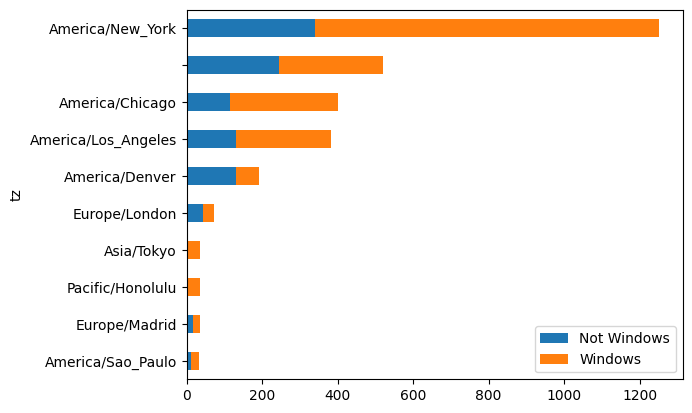

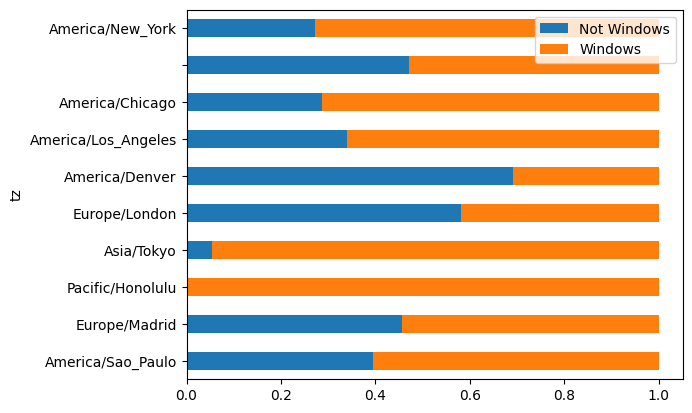

In [98]:
from numpy.core.multiarray import where
from pandas import DataFrame, Series
import pandas as pd
cframe = frame[frame.a.notnull()]
operating_system = where(cframe['a'].str.contains('Windows'),
 'Windows', 'Not Windows')
operating_system[:5]
by_tz_os = cframe.groupby(['tz', operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]
indexer = agg_counts.sum(1).argsort()
indexer[:10]
count_subset = agg_counts.take(indexer)[-10:]
count_subset
count_subset.plot(kind='barh', stacked=True)
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)
